In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from pandas_datareader import data as pdr
plt.style.use('ggplot')

In [5]:
# getting bitcoin historical price data from yahoo finance using pandas_datareader api
price_data = pdr.get_data_yahoo('BTC-USD', start=datetime(2020,1,1), end=datetime.now())
price_vec = price_data['Adj Close'].values
date_vec = price_data.index

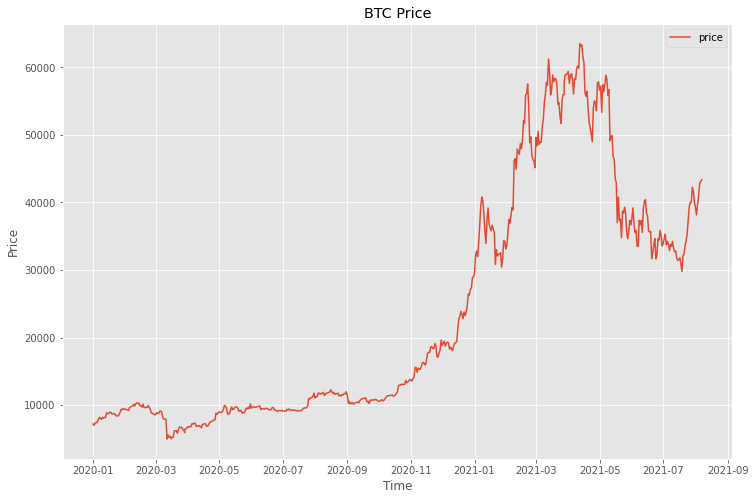

In [12]:
# plotting the time series
plt.figure(figsize=(12,8))
plt.plot(date_vec,price_vec,label='price')
plt.title('BTC Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

In [8]:
# constructing the D matrix for LSM
price_vec = price_vec.reshape(-1,1)
n = price_vec.shape[0]

D = np.zeros((n-1 , n))
for i in range(n-1):
    D[i,i] = 1
    D[i,i+1] = -1
D

array([[ 1., -1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1., -1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1., -1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1., -1.]])

In [9]:
lambda_list = [0,100,1000,2500,5000,7500,10000,100000]
x_list = []


for LAMBDA in lambda_list:
    # Ax = B --> min||Ax-b||^2
    A = np.vstack([np.eye(n), (LAMBDA**0.5)*D])
    b = np.vstack([price_vec,np.zeros((n-1,1))])

    # Least squares
    # x = INV(X.T* X) * X.T * b
    x = np.matmul(np.linalg.inv(np.matmul(A.T,A)),  np.matmul(A.T,b))    
    x_list.append(x)

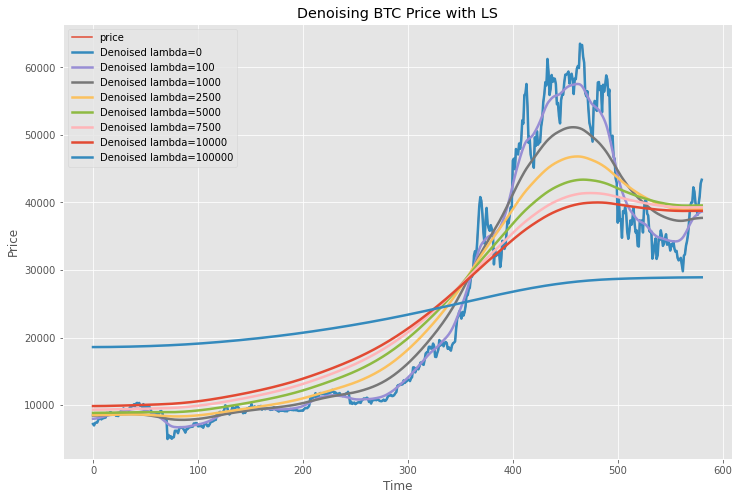

In [22]:
plt.figure(figsize=(12,8))
plt.plot(list(range(len(price_vec))),price_vec,label='price')
for ind in range(len(lambda_list)):
    plt.plot(list(range(len(price_vec))),x_list[ind].reshape(-1,) ,label=f'Denoised lambda={lambda_list[ind]}',lw=2.5)
plt.title('Denoising BTC Price with LS')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

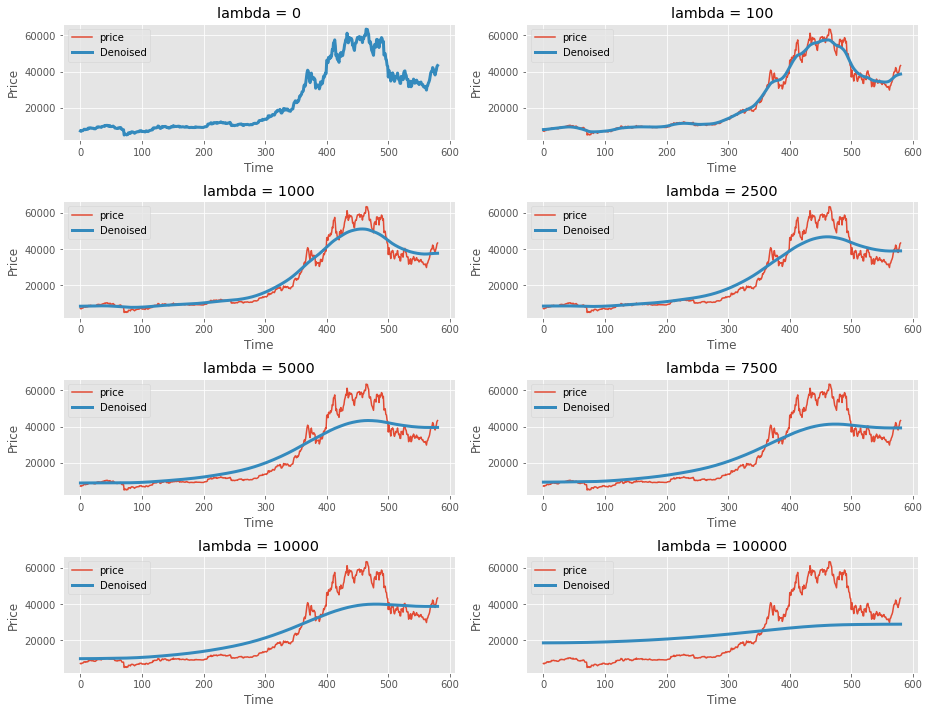

In [11]:
plt.figure(figsize=(13,10))
for ind in range(len(lambda_list)):
    plt.subplot(4,2,ind+1)
    plt.plot(list(range(len(price_vec))),price_vec,label='price')
    plt.plot(list(range(len(price_vec))),x_list[ind] ,label=f'Denoised',lw=3)
    plt.title(f'lambda = {lambda_list[ind]}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

plt.tight_layout(pad=1)
plt.show()